# Binomial Option Pricing Method for European Options

### S = Stock Price
### u , d , X(Strike Price) , n , r 


In [1]:
S = 160
u = 1.5
d = 0.5
r = 0.18 
X = 150
n = 3

3

In [2]:
R = exp(r)
p = (R-d)/(u-d)
C = zeros(Float64,(4,4)) # Array of 4*4 

4×4 Array{Float64,2}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [3]:
for i in 1:n+1
    C[i,n+1] = max(0,(S*(u^(n+1-i))*(d^(i-1)))-X)
end
for j in n:-1:1
    for i in 1:j
        C[i,j] = (p*C[i,j+1] + (1-p)*C[i+1,j+1])/R
    end
end
C



4×4 Array{Float64,2}:
 84.7478  141.105   234.709   390.0
  0.0      10.1745   17.4709   30.0
  0.0       0.0       0.0       0.0
  0.0       0.0       0.0       0.0

## Time Complexity of this Algorithm is  $$ O(n^2) $$
## Space Complexity of this Algorithm is $$ O(n^2) $$

### We now create a function and verify with the previous results of Call Option Price
### Binomial Option Pricing Model Function a.ka. BOPM

In [4]:
function BOPM(StockPrice,StrikePrice,u,d,r,N)
    R = exp(r)
    p = (R-d)/(u-d)
    C = zeros(Float64,(N+1,N+1)) 
    for i in 1:N+1
    C[i,N+1] = max(0,(StockPrice*(u^(N+1-i))*(d^(i-1)))-StrikePrice)
    end
    for j in N:-1:1
     for i in 1:j
        C[i,j] = (p*C[i,j+1] + (1-p)*C[i+1,j+1])/R
     end
   end
    return C[1,1]
end


BOPM (generic function with 1 method)

In [33]:
C = BOPM(160,150,1.5,0.5,0.18,3)

84.7478041259214

## We notice that the Call Option Price is given as:-
\begin{equation*}
C = \frac{\sum_{j=0}^n {n \choose j} p^j (1-p)^{ n-j} \mathbf{(max(0,Su^jd^{n-j} - X)}}{R^n}
\end{equation*}

## Optimisimg the Algorithm in 2 steps :-
### 1.)Find "a" the minimum number of upward price moves for the call to finish in the money

\begin{equation*}
a = \frac{ln(X/(S)(d^n))}{ln(u/d)  } 
\text{such that $Su^ad^{n-a} >= X$}
\end{equation*}

### 2.) Equation for the Call Option Price is :-

\begin{equation*}
C = \frac{\sum_{j=a}^n {n \choose j} p^j (1-p)^{ n-j} \mathbf{(max(0,Su^jd^{n-j} - X)}}{R^n}
\end{equation*}

In [50]:
function BOPMoptimised(StockPrice,StrikePrice,u,d,r,N)
    p = (exp(r)-d)/(u-d)
    a = ceil(log(StrikePrice/(StockPrice*(d^N)))/log(u/d))
    R = exp(N*r)
    b = p^N
    D = StockPrice*(u^N)
    C =  b * (D - StrikePrice)/R
    for j in N:-1:a+1
        b = (b *(1-p)*j)/((N-j+1)*p)
        D = D * (d/u)
        C = C + (b * (D - StrikePrice)/R)
    end
    return C
end

BOPMoptimised (generic function with 1 method)

In [95]:
Copt = BOPMoptimised(160,150,1.5,0.5,0.18,3)

84.74780412592142

## Time Complexity of this Algorithm is  $$ O(n-a) $$
## Space Complexity of this Algorithm is $$ O(1) $$

## Benchmarking Results

In [69]:
(@timed BOPM(160,150,1.5,0.5,0.18,3))

(84.7478041259214, 6.414e-6, 384, 0.0, Base.GC_Diff(384, 0, 0, 6, 0, 0, 0, 0, 0))

In [79]:
time     = zeros(Float64,1000)
space    = zeros(Float64,1000)
timeNew  = zeros(Float64,1000)
spaceNew = zeros(Float64,1000)
for i in 1:1000
    time[i]     = (@timed BOPM(160,150,1.5,0.5,0.18,i))[2]
    space[i]    = (@timed BOPM(160,150,1.5,0.5,0.18,i))[3]
    timeNew[i]  = (@timed BOPMoptimised(160,150,1.5,0.5,0.18,i))[2]
    spaceNew[i] = (@timed BOPMoptimised(160,150,1.5,0.5,0.18,i))[3]
end

In [80]:
time

1000-element Array{Float64,1}:
 6.414e-6  
 1.711e-6  
 4.28e-7   
 8.56e-7   
 8.55e-7   
 1.283e-6  
 1.283e-6  
 7.698e-6  
 2.566e-6  
 2.138e-6  
 2.566e-6  
 2.994e-6  
 3.421e-6  
 ⋮         
 0.00611417
 0.00581566
 0.0105246 
 0.00664317
 0.00603548
 0.010111  
 0.00621851
 0.00581566
 0.0100028 
 0.00623476
 0.0058456 
 0.0108748 

In [81]:
timeNew

1000-element Array{Float64,1}:
 6.843e-6 
 8.55e-7  
 1.283e-6 
 4.28e-7  
 8.56e-7  
 8.55e-7  
 8.56e-7  
 1.283e-6 
 8.55e-7  
 8.55e-7  
 8.55e-7  
 8.55e-7  
 8.55e-7  
 ⋮        
 1.0691e-5
 9.409e-6 
 2.8225e-5
 9.408e-6 
 9.408e-6 
 9.409e-6 
 1.0263e-5
 9.408e-6 
 8.981e-6 
 9.409e-6 
 9.409e-6 
 9.408e-6 

In [82]:
space

1000-element Array{Float64,1}:
  112.0      
  160.0      
  208.0      
  336.0      
  400.0      
  544.0      
  624.0      
  736.0      
  896.0      
 1088.0      
 1248.0      
 1488.0      
 1808.0      
    ⋮        
    7.84091e6
    7.85678e6
    7.87259e6
    7.88853e6
    7.9044e6 
    7.92034e6
    7.93621e6
    7.95221e6
    7.96814e6
    7.98414e6
    8.00008e6
    8.01614e6

In [83]:
spaceNew

1000-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

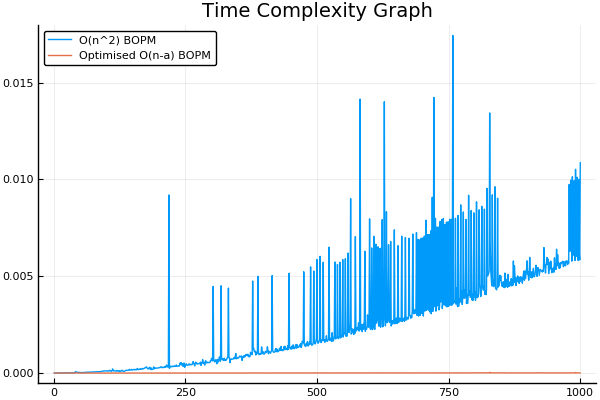

In [97]:
using Plots
pyplot()
p = plot(x = 1:1000,time,title = "Time Complexity Graph",label = "O(n^2) BOPM")
plot!(p,x = 1:1000,timeNew,label = "Optimised O(n-a) BOPM")

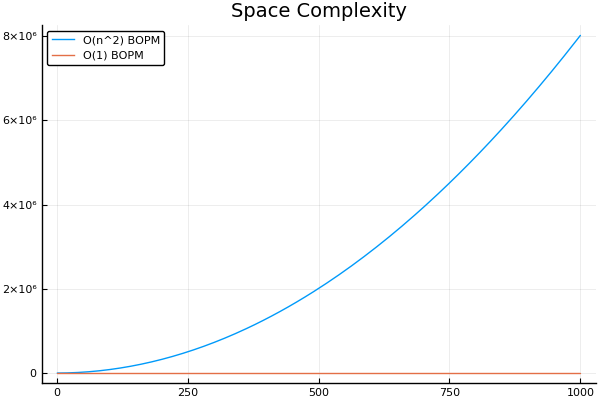

In [98]:
using Plots
pyplot()
p = plot(x = 1:1000,space,title = "Space Complexity",label = "O(n^2) BOPM")
plot!(p,x = 1:1000,spaceNew, label = "O(1) BOPM")